In [1]:
!pip install --upgrade google-api-python-client

     ---------------------------------------- 11.8/11.8 MB 3.7 MB/s eta 0:00:00
     ------------------------------------ 193.7/193.7 kB 981.1 kB/s eta 0:00:00
  Using cached httplib2-0.22.0-py3-none-any.whl (96 kB)
  Using cached google_auth_httplib2-0.2.0-py2.py3-none-any.whl (9.3 kB)
  Using cached google_api_core-2.19.0-py3-none-any.whl (139 kB)
  Using cached uritemplate-4.1.1-py2.py3-none-any.whl (10 kB)
     -------------------------------------- 229.2/229.2 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 48.8/48.8 kB ? eta 0:00:00
  Using cached cachetools-5.3.3-py3-none-any.whl (9.3 kB)


In [1]:
from googleapiclient.discovery import build
import pandas as pd 


In [2]:
import seaborn as sns

In [3]:
api_key = ''
channel_id ='UC7cs8q-gJRlGwj4A8OmCmXg'
channel_ids = ['UCnz-ZXXER4jOvuED5trXfEA', #techTFQ
               'UCiT9RITQ9PW6BhXK0y2jaeg',
               'UC7cs8q-gJRlGwj4A8OmCmXg',
               'UC2UXDak6o7rBm23k3Vv5dww',  
]
youtube = build('youtube','v3',developerKey=api_key)

## function to get channel stastics

In [4]:
def get_channel_status(youtube,channel_ids):
    request = youtube.channels().list(
    part = 'snippet,contentDetails,statistics',id=','.join(channel_ids))
    response = request.execute()
    return response


In [5]:
get_channel_status(youtube,channel_ids)

{'kind': 'youtube#channelListResponse',
 'etag': 'sle6TFfOKihnDrE0mtEXFUYi2hk',
 'pageInfo': {'totalResults': 4, 'resultsPerPage': 5},
 'items': [{'kind': 'youtube#channel',
   'etag': 'fVzgK3MhzFr51joy3IlS1_PeW5Y',
   'id': 'UC2UXDak6o7rBm23k3Vv5dww',
   'snippet': {'title': 'Tina Huang',
    'description': "Hi! My name is Tina and I'm a ex-Meta data scientist. Now I create content and other internet things! \n\nThis channel is about coding, tech, career, and self-study. I love learning new things and my goal is to always minimize effort and maximize outcome! \n\nI strive to do things in the most efficient way possible and with the highest reward. I basically refuse to do extra work to achieve my goals c: \n\n\n",
    'customUrl': '@tinahuang1',
    'publishedAt': '2013-08-28T18:05:17Z',
    'thumbnails': {'default': {'url': 'https://yt3.ggpht.com/QMaMXCtmRUXUuIWb6sUMLi_ulWNCxPuVnu3I-3IkT1YCJs6XzcxKoOFrzx_WjVW65S46S_pTRQ=s88-c-k-c0x00ffffff-no-rj',
      'width': 88,
      'height': 8

In [6]:
def get_channel_status(youtube,channel_ids):
    request = youtube.channels().list(
    part = 'snippet,contentDetails,statistics',id=','.join(channel_ids))
    response = request.execute()
    total_data = []
    for i in range(len(response['items'])):
        data = dict(channel_name = response['items'][i]['snippet']['title'],
                   Subscribers = response['items'][i]['statistics']['subscriberCount'],
                   Views =response['items'][i]['statistics']['viewCount'],
                   Total_videos = response['items'][i]['statistics']['videoCount']
                   )
        total_data.append(data)

    return total_data

In [7]:
get_channel_status(youtube,channel_ids)

[{'channel_name': 'Ken Jee',
  'Subscribers': '260000',
  'Views': '9013007',
  'Total_videos': '287'},
 {'channel_name': 'Alex The Analyst',
  'Subscribers': '794000',
  'Views': '35402181',
  'Total_videos': '308'},
 {'channel_name': 'Tina Huang',
  'Subscribers': '664000',
  'Views': '31315907',
  'Total_videos': '221'},
 {'channel_name': 'techTFQ',
  'Subscribers': '303000',
  'Views': '16707046',
  'Total_videos': '136'}]

In [8]:
channel_statistics = get_channel_status(youtube,channel_ids)

In [9]:
channel_data = pd.DataFrame(channel_statistics)

In [10]:
channel_data

,channel_name,Subscribers,Views,Total_videos
0,techTFQ,303000,16707046,136
1,Alex The Analyst,794000,35402181,308
2,Ken Jee,260000,9013007,287
3,Tina Huang,664000,31315907,221


In [11]:
channel_data.dtypes

channel_name    object
Subscribers     object
Views           object
Total_videos    object
dtype: object

In [12]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])

In [13]:
channel_data.dtypes

channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
dtype: object

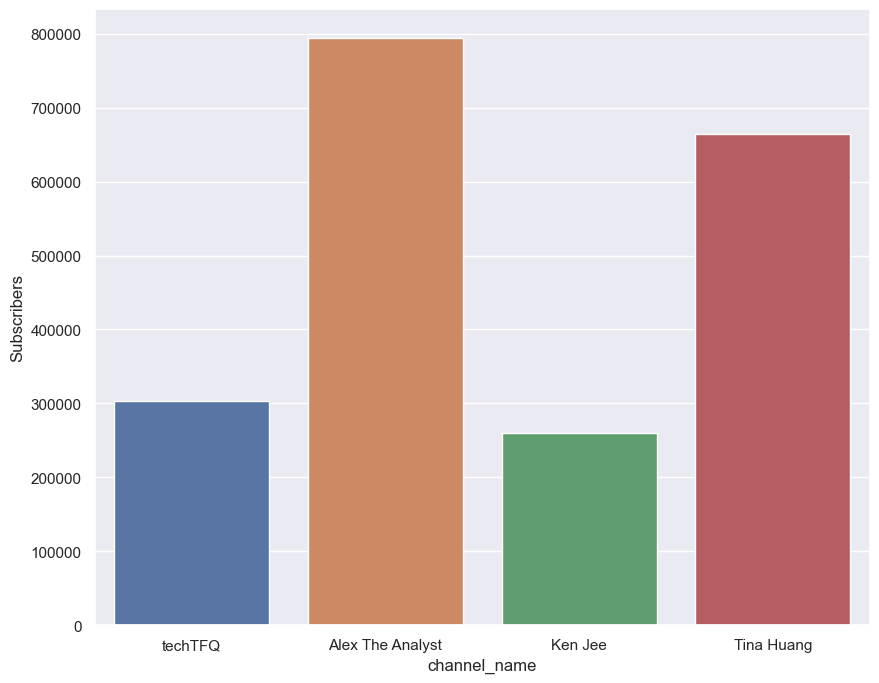

In [14]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x='channel_name',y='Subscribers',data = channel_data)

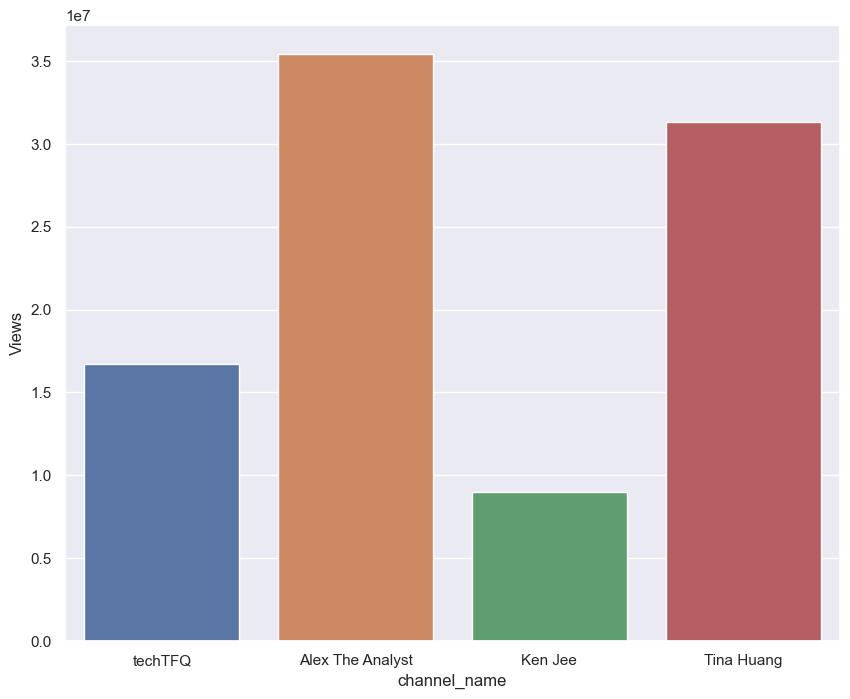

In [15]:
ax = sns.barplot(x='channel_name',y='Views',data = channel_data)

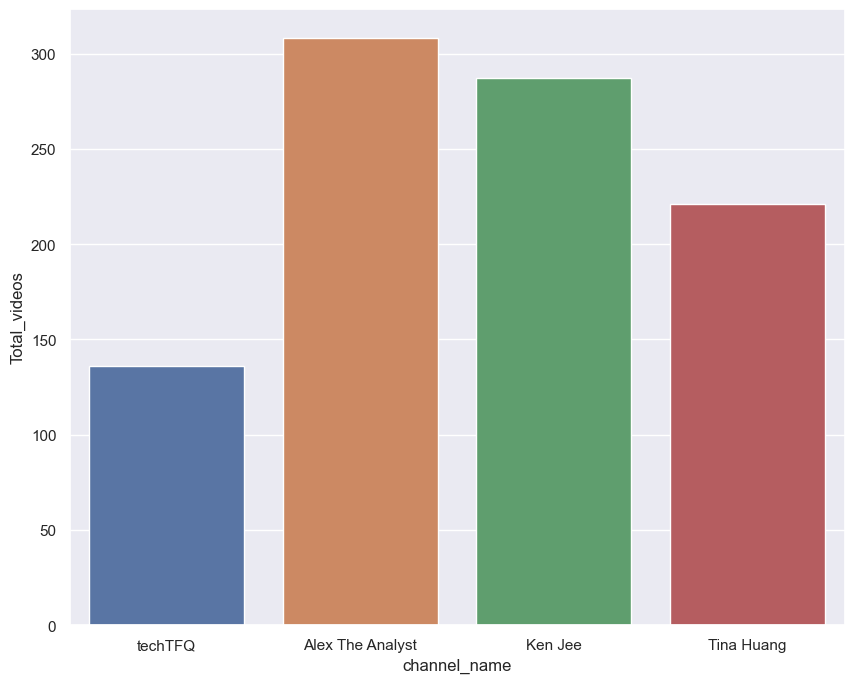

In [16]:
ax = sns.barplot(x='channel_name',y='Total_videos',data = channel_data)

In [17]:
def get_channel_status(youtube,channel_ids):
    request = youtube.channels().list(
    part = 'snippet,contentDetails,statistics',id=','.join(channel_ids))
    response = request.execute()
    total_data = []
    for i in range(len(response['items'])):
        data = dict(channel_name = response['items'][i]['snippet']['title'],
                   Subscribers = response['items'][i]['statistics']['subscriberCount'],
                   Views =response['items'][i]['statistics']['viewCount'],
                   Total_videos = response['items'][i]['statistics']['videoCount'],
                   playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads']
                   )
        total_data.append(data)

    return total_data

In [18]:
channel_statistics = get_channel_status(youtube,channel_ids)

In [19]:
channel_data = pd.DataFrame(channel_statistics)

In [20]:
channel_data

,channel_name,Subscribers,Views,Total_videos,playlist_id
0,Alex The Analyst,794000,35402181,308,UU7cs8q-gJRlGwj4A8OmCmXg
1,Tina Huang,664000,31315907,221,UU2UXDak6o7rBm23k3Vv5dww
2,techTFQ,303000,16707046,136,UUnz-ZXXER4jOvuED5trXfEA
3,Ken Jee,260000,9013007,287,UUiT9RITQ9PW6BhXK0y2jaeg


## Function to get video ids

In [21]:
playlist_id = channel_data.loc[channel_data['channel_name'] == 'Ken Jee','playlist_id'].iloc[0]

In [22]:
playlist_id

'UUiT9RITQ9PW6BhXK0y2jaeg'

In [23]:
def get_video_ids(youtube,playlist_id):
    request = youtube.playlistItems().list(
    part = 'contentDetails',
    playlistId = playlist_id,
    maxResults = 50
    )
    response = request.execute()
    video_ids = []
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
    next_page_token = response.get('nextPageToken')
    more_pages = True
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                        part = 'contentDetails',
                        playlistId = playlist_id,
                        maxResults = 50,
                        pageToken = next_page_token)
            response = request.execute()
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            next_page_token = response.get('nextPageToken')
            
    return video_ids #len(video_ids)

In [25]:
video_ids = get_video_ids(youtube,playlist_id)
video_ids

['QEDZaBMozIo',
 'Hyhfa7z0jTk',
 'L5Cis5bOwgw',
 'M1I5HlzQges',
 'T_-0l0ORi5I',
 'w13zJB_jyBI',
 'oZ9rMrqyTbI',
 '6BrYKdqq4uA',
 '1dAvbIMrLos',
 'lqYxmYMkfK8',
 '-JTU734oMfk',
 'HVpbmu7rFYE',
 'NQQ3DRdXAXE',
 'xpi-M2j3NmE',
 'X07w7QFoLpc',
 'RRnThAtKuq0',
 'r3zOpjEOkgE',
 's-XYFEzy9Wc',
 'iBh1wl4o6V4',
 'L6lXKdP4Qbg',
 'xGDl6rlBygU',
 'SY6y6Y8C594',
 '1RUj2aLQx8I',
 'MkzZXSw1Glk',
 '9neDFXTxKxA',
 'UaNNVukM27g',
 '3lN0-S3symM',
 'M-AN8eWLxms',
 'MXFZhbvQqM8',
 '54n61XjKifI',
 'pyWYIRR8rrE',
 'onwRfbt--cw',
 'u6P23ouSYhA',
 'RMMVuvS7S_g',
 '5AwbPAV8FS0',
 'A2OQgU0IRNo',
 'x5Q_nrIqFik',
 '7ja2ELBVMlU',
 'Z2MyLQa_vVw',
 'JTlB9fwYRk0',
 'OJDf_fTENJ4',
 'nqCkdqhV-JY',
 'b8t8lDL13sg',
 't6CD1EwU5kc',
 'eIxHe45hzhQ',
 '3NJOWWvNK3I',
 '4_VtMWJSo1o',
 'OybXWl3IWvI',
 'nRHPQ5ZeB5Y',
 '0JWC4M0Qhqc',
 'oNvyvYGw5n4',
 'GaZRuchRCyw',
 'EBjYqC3aNTA',
 'QMP858aZcow',
 '0ItYIoOrrUs',
 'KzTFoUbThvM',
 'bBJd0oPdNak',
 'Yk-unX4KnV4',
 'z0_xrtFdFj8',
 'vVpkXEIn-q0',
 'aipz4p7GDL4',
 'iPdO9MwdcLE',
 'YPph59

In [26]:
def get_video_details(youtube,video_ids):
    all_video_stats = []
    
    for i in range(0,len(video_ids),50):
        requests = youtube.videos().list(
        part ='snippet,statistics',
        id = ','.join(video_ids[i:i+50]))
        response = requests.execute()
        for video in response['items']:
            video_stats = dict(Titile = video['snippet']['title'],
                              publish_date = video['snippet']['publishedAt'],
                              views = video['statistics']['viewCount'],
                              Likes = video['statistics']['likeCount'],
                              comment_count = video['statistics']['commentCount'])
            all_video_stats.append(video_stats)
    return all_video_stats

In [27]:
video_details = get_video_details(youtube,video_ids)

In [28]:
video_data = pd.DataFrame(video_details)

video_data

,Titile,publish_date,views,Likes,comment_count
0,Moving On,2024-04-22T10:00:19Z,8331,403,89
1,How Does ChatGPT Image Analysis Do on an IQ Test?,2023-11-30T12:00:22Z,2664,71,22
2,A Data Dream Come True,2023-11-17T12:00:28Z,2281,94,23
3,The Death of the Full-Time Job (Rise of the Co...,2023-09-22T11:46:35Z,6198,410,77
4,How to Survive a Down Data Job Market,2023-09-05T10:50:39Z,17342,571,63
...,...,...,...,...,...
282,How to Simulate NBA Games in Python,2018-11-19T23:31:49Z,18649,409,50
283,Should You Get A Masters in Data Science?,2018-11-14T01:39:33Z,20788,304,135
284,How I Became A Data Scientist From a Business ...,2018-11-12T00:26:08Z,6564,197,23
285,Predicting Season Long NBA Wins Using Multiple...,2018-07-10T16:39:52Z,9151,194,17


In [29]:
video_data['publish_date'] = pd.to_datetime(video_data['publish_date']).dt.date
video_data['views'] = pd.to_numeric(video_data['views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data['comment_count']  = pd.to_numeric(video_data['comment_count'])

In [30]:
video_data.dtypes

Titile           object
publish_date     object
views             int64
Likes             int64
comment_count     int64
dtype: object

In [31]:
top_10 = video_data.sort_values(by='views',ascending=False).head(10)

In [32]:
top_10

,Titile,publish_date,views,Likes,comment_count
189,How I Would Learn Data Science (If I Had to St...,2020-05-08,1401133,48912,1987
165,Beginner Kaggle Data Science Project Walk-Thro...,2020-07-17,371726,7987,440
210,The Best Free Data Science Courses Nobody is T...,2020-03-09,350057,21230,619
69,How I Would Learn Data Science in 2022 (If I H...,2021-12-27,345071,15004,530
216,3 Proven Data Science Projects for Beginners (...,2020-02-17,334076,17976,527
202,Data Science Project from Scratch - Part 1 (Pr...,2020-04-03,209945,5234,173
255,The Projects You Should Do To Get A Data Scien...,2019-07-30,154523,5758,251
215,How to Set Up Your Data Science Environment (A...,2020-02-21,139847,2587,96
186,How to Make A Data Science Portfolio Website w...,2020-05-15,139350,4594,194
102,Why You Probably Won't Become a Data Scientist,2021-04-09,139245,4038,474


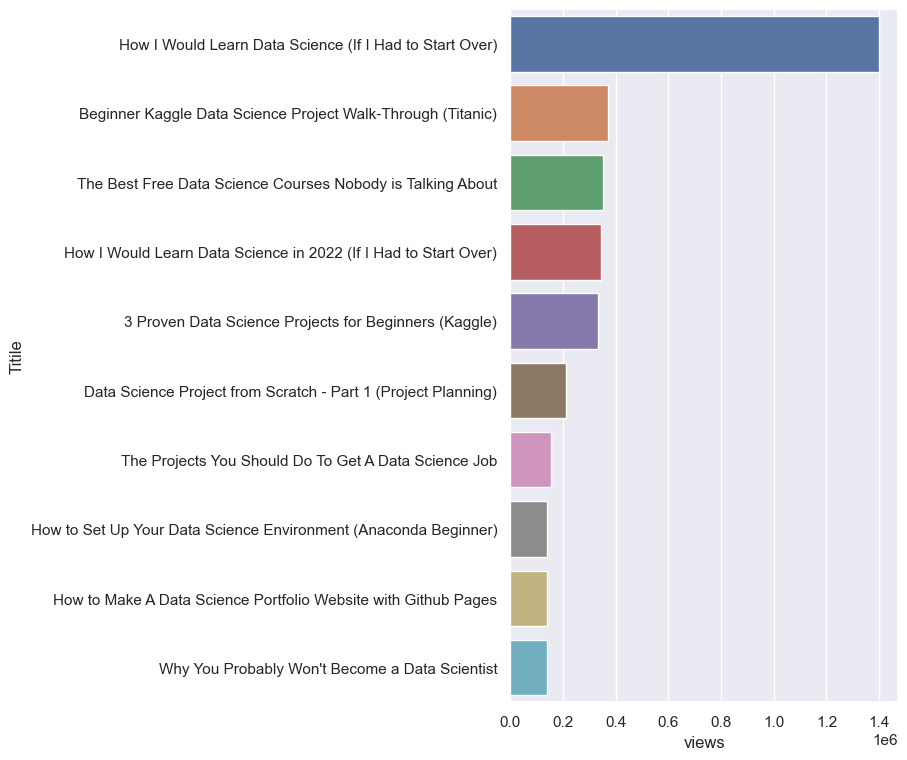

In [33]:
sns.set(rc={'figure.figsize':(5,9)})

ax = sns.barplot(x='views',y='Titile',data = top_10)

In [38]:
video_data

,Titile,publish_date,views,Likes,comment_count
0,Moving On,2024-04-22,8331,403,89
1,How Does ChatGPT Image Analysis Do on an IQ Test?,2023-11-30,2664,71,22
2,A Data Dream Come True,2023-11-17,2281,94,23
3,The Death of the Full-Time Job (Rise of the Co...,2023-09-22,6198,410,77
4,How to Survive a Down Data Job Market,2023-09-05,17342,571,63
...,...,...,...,...,...
282,How to Simulate NBA Games in Python,2018-11-19,18649,409,50
283,Should You Get A Masters in Data Science?,2018-11-14,20788,304,135
284,How I Became A Data Scientist From a Business ...,2018-11-12,6564,197,23
285,Predicting Season Long NBA Wins Using Multiple...,2018-07-10,9151,194,17


In [41]:
video_data.to_csv('Youtube.csv')

In [ ]:
#it can load only 50 videos 
def get_video_details(youtube,video_ids):    
        requests = youtube.videos().list(
        part ='snippet,statistics',
        id = ','.join(video_ids[:50]))
        response = requests.execute()

In [81]:
get_video_details(youtube,video_ids)

{'kind': 'youtube#videoListResponse',
 'etag': '2Q4affAaXy9RKY1R9yllVkMmm6k',
 'items': [{'kind': 'youtube#video',
   'etag': '0MDhevgmHHJ3BTPvOTYeFpuM7K8',
   'id': 'QEDZaBMozIo',
   'snippet': {'publishedAt': '2024-04-22T10:00:19Z',
    'channelId': 'UCiT9RITQ9PW6BhXK0y2jaeg',
    'title': 'Moving On',
    'description': "#datascience  #KenJee \nSome changes are coming. I feel like I owe it to everyone who has been on this journey to explain a few things. \n\nThe Exponential Athlete Podcast:\nYouTube - @ExponentialAthlete \nSpotify - https://open.spotify.com/show/4XmCCYsVVOVmRavFYT5b1C \nApple - https://podcasts.apple.com/us/podcast/the-exponential-athlete/id1726985417 \n\nKen's Nearest Neighbors Podcast:\nYouTube - @KNNPodcast \nSpotify - https://open.spotify.com/show/7fJsuxiZl4TS1hqPUmDFbl?si=97427f5d628d4af6\nApple - https://podcasts.apple.com/us/podcast/kens-nearest-neighbors/id1538368692\n\nSponsors, Affiliates, and Partners:\n- Pathrise - http://pathrise.com/KenJee | Career men

In [36]:
def get_video_ids(youtube,playlist_id):
    request = youtube.playlistItems().list(
    part = 'contentDetails',
    playlistId = playlist_id,
    maxResults = 50
    )
    response = request.execute()
    return response 

In [37]:
get_video_ids(youtube,playlist_id)

{'kind': 'youtube#playlistItemListResponse',
 'etag': 'e1hH8dBl3K8gnhcRUBY30Pk4X2I',
 'nextPageToken': 'EAAafVBUOkNESWlFRGhETlVaQlJUWkNNVFkwT0RFelF6Z29BVWpDbUxYMGo5aUZBMUFCV2pnaVEyaG9WbFpYYkZWUFZrcEtWa1pGTlZWR1l6SlJiV2haVTNwQ05VMXRjR2hhVjJOVFJFRnFNRzFhTm5oQ2FFUlJjemhZWmtGUkln',
 'items': [{'kind': 'youtube#playlistItem',
   'etag': 'KWnUQa_ymaFGGZPQiGmI3gKTj5Q',
   'id': 'VVVpVDlSSVRROVBXNkJoWEsweTJqYWVnLlFFRFphQk1veklv',
   'contentDetails': {'videoId': 'QEDZaBMozIo',
    'videoPublishedAt': '2024-04-22T10:00:19Z'}},
  {'kind': 'youtube#playlistItem',
   'etag': '_I99pBYZ3_8YRGiTZue9D45FHf0',
   'id': 'VVVpVDlSSVRROVBXNkJoWEsweTJqYWVnLkh5aGZhN3owalRr',
   'contentDetails': {'videoId': 'Hyhfa7z0jTk',
    'videoPublishedAt': '2023-11-30T12:00:22Z'}},
  {'kind': 'youtube#playlistItem',
   'etag': 'OwocmkLUUACMmDgcgw78tBXO1kU',
   'id': 'VVVpVDlSSVRROVBXNkJoWEsweTJqYWVnLkw1Q2lzNWJPd2d3',
   'contentDetails': {'videoId': 'L5Cis5bOwgw',
    'videoPublishedAt': '2023-11-17T12:00:28Z'}},
  {'